In [9]:
#Importamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
from sklearn import preprocessing
from sklearn import metrics
from sklearn import linear_model


In [10]:
#Leemos el archivo csv concatenado
df = pd.read_csv('dfconcatenado.csv')

In [11]:
#Vemos cuantas filas y columnas hay
df.shape

(45527, 22)

In [12]:
#resumen descriptivo
df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,release_year,return
count,4.552700e+04,45527.000000,45527.000000,4.552700e+04,45281.000000,45527.000000,45527.000000,45527.000000,45527.0
mean,4.234101e+06,108058.984185,2.927236,1.124298e+07,94.175062,5.624886,110.115338,1991.888286,inf
std,1.744907e+07,112185.103088,6.004610,6.444704e+07,38.306609,1.914569,492.079103,24.052752,NaN
min,0.000000e+00,2.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1874.000000,0.0
25%,0.000000e+00,26370.500000,0.389705,0.000000e+00,85.000000,5.000000,3.000000,1978.000000,0.0
50%,0.000000e+00,59882.000000,1.131262,0.000000e+00,95.000000,6.000000,10.000000,2001.000000,0.0
75%,0.000000e+00,156600.000000,3.694040,0.000000e+00,107.000000,6.800000,34.000000,2010.000000,0.0
max,3.800000e+08,469172.000000,547.488298,2.787965e+09,1256.000000,10.000000,14075.000000,2020.000000,inf


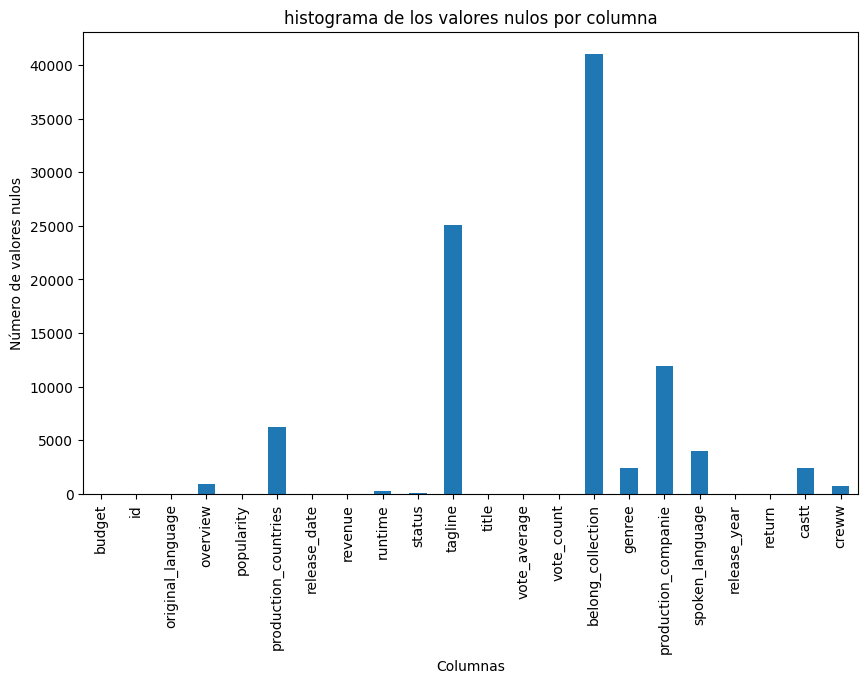

In [13]:
#Hacemos un histograma de los valores nulos por columna
def null_columna(df):
    
    nulls = df.isnull().sum()

    #Creamos el histograma para visualizar los nulos
    plt.figure(figsize=(10,6))
    nulls.plot(kind='bar')
    plt.title('histograma de los valores nulos por columna')
    plt.xlabel('Columnas')
    plt.ylabel('Número de valores nulos')
    plt.show()

null_columna(df)


In [14]:
#buscamos correlaciones
df_corr = df[['budget', 'popularity', 'revenue','return']].dropna().corr()


<Axes: >

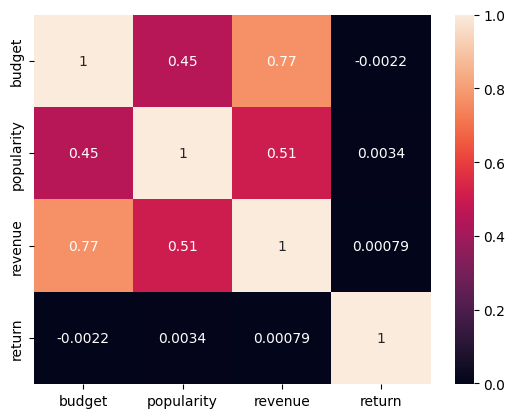

In [15]:
sns.heatmap(df_corr, annot=True)

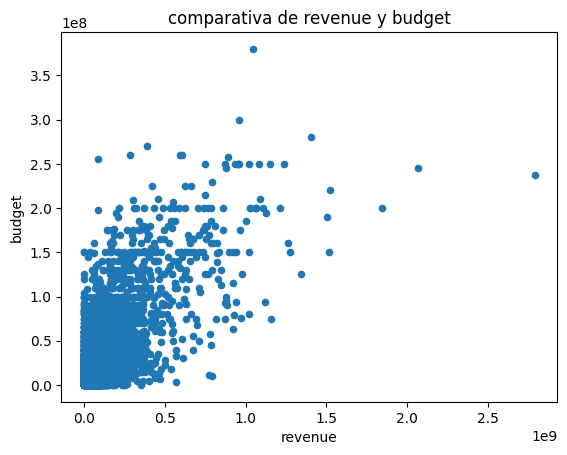

In [17]:
#Hacemos una comparación de la columna revenue y budget
df.plot(kind='scatter',
        x='revenue',
        y='budget',
        title='comparativa de revenue y budget')

plt.show()

In [26]:
#Vemos cuantas peliculas hay en el conjunto de datos y cuales son los generos de las peliculas
# Cantidad de películas
print("Cantidad de películas:", len(df))

# Géneros de las películas
print("Géneros de las películas:")
print(df["genree"].value_counts())

Cantidad de películas: 45527
Géneros de las películas:
Drama                                                         5012
Comedy                                                        3627
Documentary                                                   2721
Drama, Romance                                                1304
Comedy, Drama                                                 1140
                                                              ... 
Adventure, Animation, Action, Comedy, Family                     1
Western, Music                                                   1
Crime, Adventure, Action, Comedy, Thriller                       1
Mystery, Drama, Fantasy, Science Fiction, Thriller, Horror       1
Family, Animation, Romance, Comedy                               1
Name: genree, Length: 4064, dtype: int64


In [27]:
#Vemos cual es la duración promedio de las peliculas
print('La Duración promedio de las películas:', df["runtime"].mean())

La Duración promedio de las películas: 94.17506238819814


In [37]:
# Actores más populares
actors = df["castt"].value_counts()
print("Actores más populares:")
print(actors.head(10))

Actores más populares:
Georges Méliès                                                                                                                                                               24
Louis Theroux                                                                                                                                                                15
Mel Blanc                                                                                                                                                                    12
Jimmy Carr                                                                                                                                                                    9
Petteri Summanen, Ismo Kallio, Eppu Salminen, Irina Björklund, Hannu-Pekka Björkman, Jenni Banerjee, Mikko Leppilampi, Lena Meriläinen, Mari Perankoski, Risto Kaskilahti     9
Louis C.K.                                                                                       

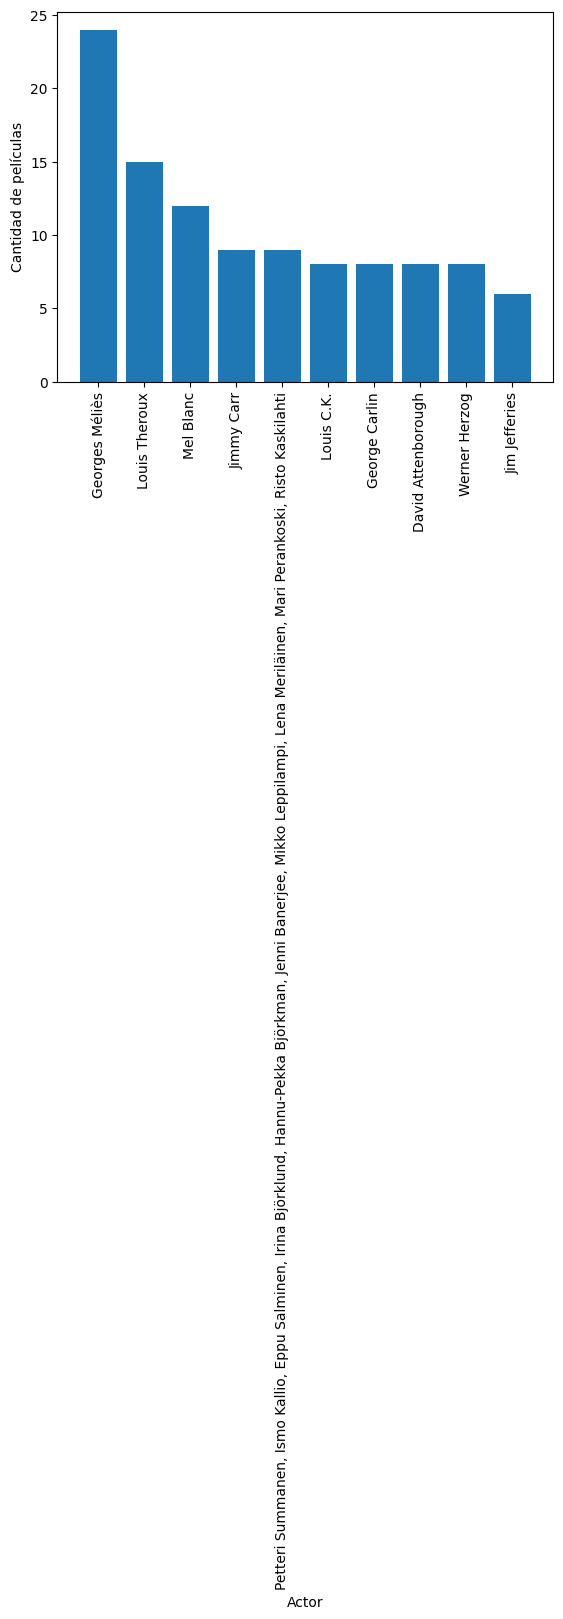

In [38]:
#Gráfico de barras de los actores más populares
plt.bar(actors.head(10).index, actors.head(10).values)
plt.xticks(rotation=90)
plt.xlabel("Actor")
plt.ylabel("Cantidad de películas")
plt.show()

In [39]:
#Idiomas más comunes en las peliculas
languages = df["original_language"].value_counts()
print("Idiomas más comunes:")
print(languages.head(10))

Idiomas más comunes:
en    32298
fr     2444
it     1531
ja     1360
de     1088
es      992
ru      824
hi      508
ko      445
zh      409
Name: original_language, dtype: int64


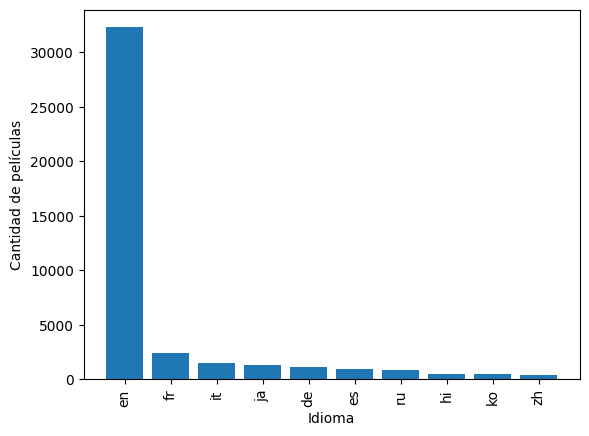

In [40]:
# gráfico de barras de los idiomas más comunes
plt.bar(languages.head(10).index, languages.head(10).values)
plt.xticks(rotation=90)
plt.xlabel("Idioma")
plt.ylabel("Cantidad de películas")
plt.show()